First five rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBe

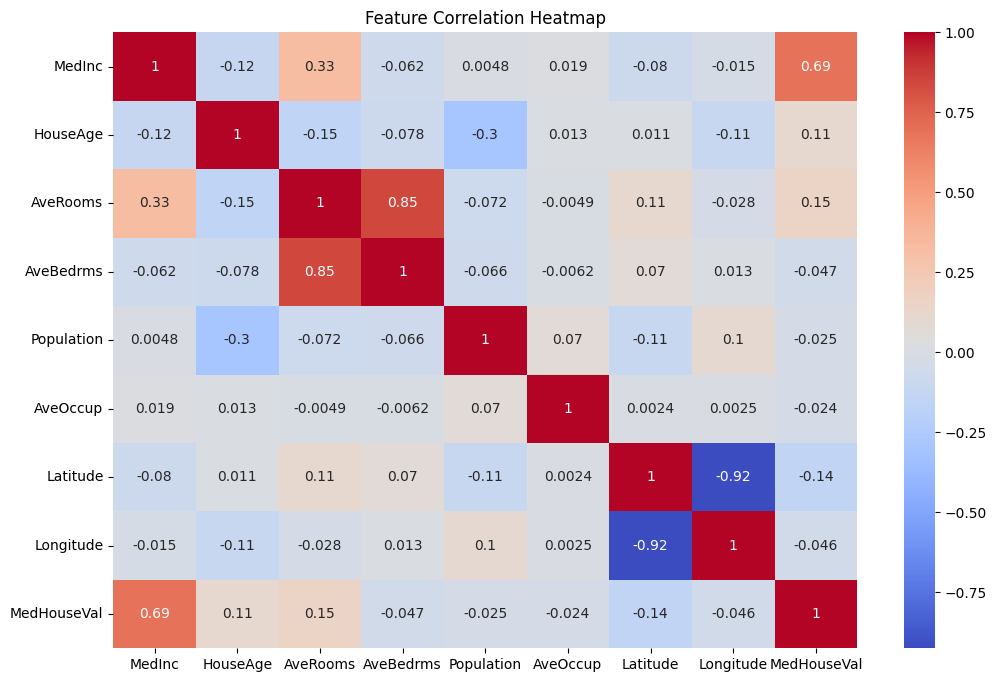


Training samples: 16512
Testing samples: 4128

Model Performance:
Mean Squared Error (MSE): 0.56
R-squared (R2 Score): 0.58


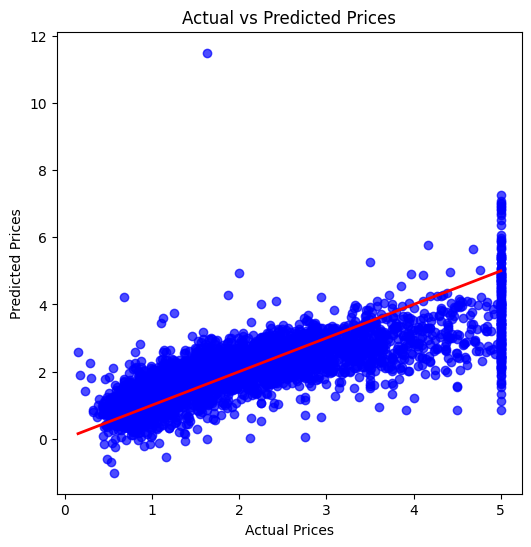

In [3]:
# House Price Prediction
# Internship Project - Cloudcredits Technologies

# ---------------------------
# 1. Import required libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 2. Load the California Housing dataset
# ---------------------------
california = fetch_california_housing(as_frame=True)
data = california.frame

print("First five rows of the dataset:")
print(data.head())

# ---------------------------
# 3. Explore the dataset
# ---------------------------
print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ---------------------------
# 4. Split data into train and test sets
# ---------------------------
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']              # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# ---------------------------
# 5. Train the Linear Regression model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# 6. Make predictions
# ---------------------------
predictions = model.predict(X_test)

# ---------------------------
# 7. Evaluate the model
# ---------------------------
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# Plot Actual vs Predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()
